# 데이터 분석 과제

## 도로교통공단_사망 교통사고 정보

교통사고로 사망원인과 지역 차종을 확인하고 어떤 관련이 있는
상향식 접근 방식을통하여 확인한다

# 01. 라이브러리 가져오기 및 기타 설정

In [1]:
#기본 패키지 불러오기
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import os
plt.style.use('seaborn') #그래프 기본 설정
sns.set(font_scale=1)

import warnings #경고 메세지 무시하기
warnings.simplefilter(action='ignore', category=FutureWarning)

<ipython-input-1-d455d0cfe4eb>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') #그래프 기본 설정


# 02. 데이터 불러오기 Load Data

In [2]:
os.chdir('./drive/MyDrive/study')

In [3]:
os.listdir()

['도로교통공단_사망 교통사고 정보_2020.csv',
 '도로교통공단_사망 교통사고 정보_2019.csv',
 '제목없는 폴더',
 'yongsan_cctv.html',
 'Untitled0.ipynb',
 '도로교통공단_사망 교통사고 정보_2021.csv',
 '도로교통공단_사망 교통사고 정보_2022.csv']

In [4]:
df2022 = pd.read_csv('도로교통공단_사망 교통사고 정보_2022.csv', encoding ='euc-kr')
df2021 = pd.read_csv('도로교통공단_사망 교통사고 정보_2021.csv', encoding ='euc-kr')
df2020 = pd.read_csv('도로교통공단_사망 교통사고 정보_2020.csv', encoding ='euc-kr')
df2019 = pd.read_csv('도로교통공단_사망 교통사고 정보_2019.csv', encoding ='euc-kr')

In [5]:
df = {'df2022' : df2022,
      'df2021' : df2021,
      'df2020' : df2020,
      'df2019' : df2019,}

Concat 이전 columns명을 확인

In [6]:
for i in df:
  print(i,df[i].shape)
  print([x for x in df[i].columns])

df2022 (2658, 23)
['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반', '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도']
df2021 (2816, 23)
['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반', '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X(UTMK)', '발생위치Y(UTMK)', '경도', '위도']
df2020 (2983, 23)
['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반', '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도']
df2019 (3233, 23)
['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반', '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도']


In [7]:
df2021.rename(columns ={'발생위치X(UTMK)' : '발생위치X_UTMK',
                        '발생위치Y(UTMK)' : '발생위치Y_UTMK'}, inplace = True)
#2021 데이터의 일부 컬럼명이 다른것을 확인하고 동일한 형식으로 변환

In [8]:
df2 = pd.concat(df)
df2 = df2.reset_index(drop=True)

도로교통공단_사망 교통사고 정보 데이터(2022 ~ 2019)

In [9]:
df2.head()

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2022,2022-01-01 10:00,주,토,1,0,0,0,0,전남,...,공작물충돌,안전운전 의무 불이행,단일로,교량위,승용차,없음,1000059.0,1660526.0,127.500646,34.939564
1,2022,2022-01-01 14:00,주,토,1,0,0,0,0,전북,...,추돌,안전운전 의무 불이행,단일로,기타단일로,원동기장치자전거,승용차,965929.0,1760951.0,127.122710,35.844490
2,2022,2022-01-01 17:00,주,토,1,0,0,0,0,경기,...,도로이탈 추락,안전운전 의무 불이행,단일로,기타단일로,이륜차,없음,966667.0,2021002.0,127.119365,38.188669
3,2022,2022-01-01 20:00,야,토,1,0,0,0,0,부산,...,기타,안전운전 의무 불이행,단일로,고가도로위,승용차,승용차,1156990.0,1697307.0,129.225773,35.258920
4,2022,2022-01-02 06:00,주,일,1,0,0,0,0,서울,...,횡단중,안전운전 의무 불이행,단일로,기타단일로,승합차,보행자,950217.0,1953529.0,126.936182,37.579800


데이터 크기 확인 및 데이터 타입과 널값 확인
### 널값 없음

In [10]:
print(df2.shape)
print(df2.info())

(11690, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11690 entries, 0 to 11689
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   발생년         11690 non-null  int64  
 1   발생년월일시      11690 non-null  object 
 2   주야          11690 non-null  object 
 3   요일          11690 non-null  object 
 4   사망자수        11690 non-null  int64  
 5   부상자수        11690 non-null  int64  
 6   중상자수        11690 non-null  int64  
 7   경상자수        11690 non-null  int64  
 8   부상신고자수      11690 non-null  int64  
 9   발생지시도       11690 non-null  object 
 10  발생지시군구      11690 non-null  object 
 11  사고유형_대분류    11690 non-null  object 
 12  사고유형_중분류    11690 non-null  object 
 13  사고유형        11690 non-null  object 
 14  가해자법규위반     11690 non-null  object 
 15  도로형태_대분류    11690 non-null  object 
 16  도로형태        11690 non-null  object 
 17  가해자_당사자종별   11690 non-null  object 
 18  피해자_당사자종별   11690 non-null  object 
 19  발생위치X_UTMK  1

objcet columns과 그렇지 않은 columns 구분

In [11]:
print(df2.select_dtypes(include=object).columns)
print(df2.select_dtypes(exclude=object).columns)


Index(['발생년월일시', '주야', '요일', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형',
       '가해자법규위반', '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별'],
      dtype='object')
Index(['발생년', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수', '발생위치X_UTMK',
       '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')


범주형 데이터의 종류와 갯수 확인

In [12]:
for df2_columns in [x for x in df2.select_dtypes(include=object).columns]:
  print(df2[df2_columns].value_counts().sort_values(ascending=False))
  print(len(df2[df2_columns].unique()),"개")
  print('*'*200)

2021-10-14 18:00    5
2022-10-10 16:00    4
2020-01-17 21       4
2019-10-22 06       4
2019-05-13 10       4
                   ..
2019-03-20 09       1
2019-03-20 13       1
2019-03-20 23       1
2019-03-21 03       1
2019-12-31 16       1
Name: 발생년월일시, Length: 9718, dtype: int64
9718 개
********************************************************************************************************************************************************************************************************
주    6289
야    5401
Name: 주야, dtype: int64
2 개
********************************************************************************************************************************************************************************************************
금    1809
월    1753
수    1748
목    1730
화    1704
토    1574
일    1372
Name: 요일, dtype: int64
7 개
********************************************************************************************************************************************************************

날짜데이터가 object type임을 확인후 datatype 변경

In [13]:
df2['발생년월일시'] = pd.to_datetime(df2['발생년월일시'])

데이터 통계량 파악


In [14]:
df2.describe()

,발생년,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
count,11690.000000,11690.000000,11690.000000,11690.000000,11690.000000,11690.000000,1.169000e+04,1.169000e+04,11690.000000,11690.000000
mean,2020.419076,1.033447,0.497177,0.197263,0.269974,0.029940,1.005590e+06,1.819675e+06,127.559596,36.371352
std,1.118673,0.223123,1.621578,0.695187,1.075949,0.316312,7.726056e+04,1.175394e+05,0.857465,1.060735
min,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.521000e+05,1.470330e+06,124.678090,33.217963
25%,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.454928e+05,1.723498e+06,126.889300,35.500668
50%,2020.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.756200e+05,1.827708e+06,127.226456,36.445693
75%,2021.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.072126e+06,1.931536e+06,128.305328,37.381540
max,2022.000000,7.000000,59.000000,19.000000,40.000000,15.000000,1.296158e+06,2.056736e+06,130.848830,38.507834


수치형 데이터에대한 unique값 % 갯수 확인

In [15]:
for df2_columns in [x for x in df2.select_dtypes(include =int).columns]:
  print(df2[df2_columns].value_counts().sort_values(ascending=False))
  print(len(df2[df2_columns].unique()),"개")
  print('*'*200)

2019    3233
2020    2983
2021    2816
2022    2658
Name: 발생년, dtype: int64
4 개
********************************************************************************************************************************************************************************************************
1    11364
2      284
3       29
4        6
5        5
7        1
6        1
Name: 사망자수, dtype: int64
7 개
********************************************************************************************************************************************************************************************************
0     8943
1     1596
2      576
3      250
4      126
5       66
6       27
7       25
8       19
9       11
16       9
10       6
14       5
11       4
12       4
13       4
15       3
31       3
17       3
18       2
27       2
34       2
59       1
19       1
24       1
25       1
Name: 부상자수, dtype: int64
26 개
************************************************************************************************

차트 표시를 위해 한글 컬럼과 데이터를 영어로 변경

In [16]:
df2[['발생지시도'	,'사망자수','부상자수','중상자수','경상자수','부상신고자수']].groupby('발생지시도').sum().sort_values('사망자수',ascending =False)

,사망자수,부상자수,중상자수,경상자수,부상신고자수
발생지시도,,,,,
경기,2327,1314,389,756,169
경북,1351,620,284,314,22
경남,1088,462,231,199,32
충남,1064,531,227,283,21
전남,1023,419,182,224,13
서울,933,316,99,197,20
전북,845,407,167,236,4
충북,668,463,177,273,13
강원,602,329,167,147,15


In [17]:
for df2_columns in [x for x in df2.select_dtypes(include=object).columns]:
  print(df2[[df2_columns,'사망자수','부상자수','중상자수','경상자수','부상신고자수']].groupby(df2_columns).sum().sort_values('사망자수',ascending =False))
  print('*'*200)

    사망자수  부상자수  중상자수  경상자수  부상신고자수
주야                                
주   6475  3452  1327  1888     237
야   5606  2360   979  1268     113
********************************************************************************************************************************************************************************************************
    사망자수  부상자수  중상자수  경상자수  부상신고자수
요일                                
금   1857   817   330   422      65
월   1838   795   293   459      43
목   1795   794   317   424      53
수   1792   854   316   482      56
화   1758   855   343   471      41
토   1630   950   377   511      62
일   1411   747   330   387      30
********************************************************************************************************************************************************************************************************
       사망자수  부상자수  중상자수  경상자수  부상신고자수
발생지시도                                
경기     2327  1314   389   756     169
경북     1351   620   284   314

In [18]:
df2.columns

Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK',
       '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

In [19]:
df3 = df2.copy()
#데이터 백업
df3.head()

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2022,2022-01-01 10:00:00,주,토,1,0,0,0,0,전남,...,공작물충돌,안전운전 의무 불이행,단일로,교량위,승용차,없음,1000059.0,1660526.0,127.500646,34.939564
1,2022,2022-01-01 14:00:00,주,토,1,0,0,0,0,전북,...,추돌,안전운전 의무 불이행,단일로,기타단일로,원동기장치자전거,승용차,965929.0,1760951.0,127.122710,35.844490
2,2022,2022-01-01 17:00:00,주,토,1,0,0,0,0,경기,...,도로이탈 추락,안전운전 의무 불이행,단일로,기타단일로,이륜차,없음,966667.0,2021002.0,127.119365,38.188669
3,2022,2022-01-01 20:00:00,야,토,1,0,0,0,0,부산,...,기타,안전운전 의무 불이행,단일로,고가도로위,승용차,승용차,1156990.0,1697307.0,129.225773,35.258920
4,2022,2022-01-02 06:00:00,주,일,1,0,0,0,0,서울,...,횡단중,안전운전 의무 불이행,단일로,기타단일로,승합차,보행자,950217.0,1953529.0,126.936182,37.579800


In [20]:
df2.rename(columns = {'발생년' : 'year',
                      '발생년월일시' : 'ymdh',
                      '주야' : 'apm',
                      '요일' : 'week',
                      '사망자수' : 'wound',
                      '부상자수' : 'b_wound',
                      '중상자수' : 'm_wound',
                      '경상자수' : 's_wound',
                      '부상신고자수' : 'wound_c',
                      '발생지시도' : 'city',
                      '발생지시군구': 'city_county',
                      '사고유형_대분류' : 'wound_main_c',
                      '사고유형_중분류' : 'wound_middle_c',
                      '사고유형' : 'wound_t',
                      '가해자법규위반' : 'a_violation',
                      '도로형태_대분류' : 'road_main',
                      '도로형태' : 'road',
                      '가해자_당사자종별' : 'a_car',
                      '피해자_당사자종별' : 'v_car',
                      '발생위치X_UTMK' : 'incldent_location_x',
                      '발생위치Y_UTMK' : 'incldent_location_y',
                      '경도' : 'longitude',
                      '위도' : 'latitude'
                      }, inplace = True)

In [21]:
df2.apm = df2.apm.map(lambda x : 0 if x=='주' else 1)
#주간은 0 야간은 1

In [22]:
def week_e(x):
  if x =='월':
    return 1
  elif x == '화':
    return 2
  elif x == '수':
    return 3
  elif x == '목':
    return 4
  elif x == '금':
    return 5
  elif x == '토':
    return 6
  elif x == '일':
    return 0

df2.week = df2.week.apply(week_e)

df2.week.unique()

array([6, 0, 1, 2, 3, 4, 5])

In [23]:
def city_e(x):
  if x =='전남':
    return 'CLN'
  elif x == '전북':
    return 'CLB'
  elif x == '경기':
    return 'KYG'
  elif x == '부산':
    return 'PUS'
  elif x == '서울':
    return 'SEL'
  elif x == '인천':
    return 'INC'
  elif x == '충북':
    return 'CCB'
  elif x == '경남':
    return 'KSN'
  elif x == '경북':
    return 'KSB'
  elif x == '강원':
    return 'KAW'
  elif x == '광주':
    return 'KWJ'
  elif x == '대구':
    return 'TAE'
  elif x == '충남':
    return 'CCN'
  elif x == '대전':
    return 'TAJ'
  elif x == '제주':
    return 'CHJ'
  elif x == '세종':
    return 'SEJ'
  elif x == '울산':
    return 'USN'
df2.city = df2.city.apply(city_e)

df2.city.unique()

array(['CLN', 'CLB', 'KYG', 'PUS', 'SEL', 'INC', 'CCB', 'KSN', 'KSB',
       'KAW', 'KWJ', 'TAE', 'CCN', 'TAJ', 'CHJ', 'SEJ', 'USN'],
      dtype=object)

In [24]:
def wound_main_e(x):
  if x =='차량단독':
    return 'car accident'
  elif x == '차대차':
    return 'car to car'
  elif x == '차대사람':
    return 'car to parson'
  elif x == '철길건널목':
    return 'iron crossing'

df2.wound_main_c = df2.wound_main_c.apply(wound_main_e)

df2.wound_main_c.unique()

array(['car accident', 'car to car', 'car to parson', 'iron crossing'],
      dtype=object)

In [25]:
df2.wound_middle_c.unique()

array(['공작물충돌', '추돌', '도로이탈', '기타', '횡단중', '측면충돌', '차도통행중', '전도',
       '길가장자리구역통행중', '정면충돌', '보도통행중', '전복', '철길건널목', '주/정차차량 충돌', '후진중충돌'],
      dtype=object)

In [26]:
def wound_middle_e(x):
  if x =='공작물충돌':
    return 'Workpiece Collision'
  elif x == '추돌':
    return 'bump'
  elif x == '도로이탈':
    return 'off road'
  elif x == '기타':
    return 'etc'
  elif x == '횡단중':
    return 'crossing'
  elif x == '측면충돌':
    return 'side impact'
  elif x == '차도통행중':
    return 'on the road'
  elif x == '전도':
    return 'conduction'
  elif x == '전복':
    return 'overturn'
  elif x == '길가장자리구역통행중':
    return 'Passing through the road edge area'
  elif x == '정면충돌':
    return 'head-on collision'
  elif x == '보도통행중':
    return 'on the sidewalk'
  elif x == '철길건널목':
    return 'railroad crossing'
  elif x == '주/정차차량 충돌':
    return 'Parked/Standing Vehicle Collision'
  elif x == '후진중충돌':
    return 'collision while reversing'

df2.wound_middle_c = df2.wound_middle_c.apply(wound_middle_e)

df2.wound_middle_c.unique()

array(['Workpiece Collision', 'bump', 'off road', 'etc', 'crossing',
       'side impact', 'on the road', 'conduction',
       'Passing through the road edge area', 'head-on collision',
       'on the sidewalk', 'overturn', 'railroad crossing',
       'Parked/Standing Vehicle Collision', 'collision while reversing'],
      dtype=object)

In [27]:
df2.wound_t.unique()

array(['공작물충돌', '추돌', '도로이탈 추락', '기타', '횡단중', '측면충돌', '차도통행중', '전도',
       '길가장자리구역통행중', '정면충돌', '보도통행중', '전복', '철길건널목', '주/정차차량 충돌',
       '도로이탈 기타', '후진중충돌'], dtype=object)

In [28]:
def wound_t_e(x):
  if x =='공작물충돌':
    return 'Workpiece Collision'
  elif x == '추돌':
    return 'bump'
  elif x == '도로이탈 추락':
    return 'off road crash'
  elif x == '기타':
    return 'etc'
  elif x == '횡단중':
    return 'crossing'
  elif x == '측면충돌':
    return 'side impact'
  elif x == '차도통행중':
    return 'on the road'
  elif x == '전도':
    return 'conduction'
  elif x == '전복':
    return 'overturn'
  elif x == '길가장자리구역통행중':
    return 'Passing through the road edge area'
  elif x == '정면충돌':
    return 'head-on collision'
  elif x == '보도통행중':
    return 'on the sidewalk'
  elif x == '철길건널목':
    return 'railroad crossing'
  elif x == '주/정차차량 충돌':
    return 'Parked/Standing Vehicle Collision'
  elif x == '후진중충돌':
    return 'collision while reversing'
  elif x == '도로이탈 기타':
    return 'off road etc'

df2.wound_t = df2.wound_t.apply(wound_t_e)

df2.wound_t.unique()

array(['Workpiece Collision', 'bump', 'off road crash', 'etc', 'crossing',
       'side impact', 'on the road', 'conduction',
       'Passing through the road edge area', 'head-on collision',
       'on the sidewalk', 'overturn', 'railroad crossing',
       'Parked/Standing Vehicle Collision', 'off road etc',
       'collision while reversing'], dtype=object)

In [29]:
df2.a_violation.unique()

array(['안전운전 의무 불이행', '안전거리 미확보', '기타', '신호위반', '보행자 보호의무 위반', '중앙선 침범',
       '교차로 통행방법 위반', '과속'], dtype=object)

In [30]:
def a_violation_t(x):
  if x =='안전운전 의무 불이행':
    return 'Non-fulfillment of safe driving duty'
  elif x == '안전거리 미확보':
    return 'Unsecured safety distance'
  elif x == '신호위반':
    return 'signal violation'
  elif x == '기타':
    return 'etc'
  elif x == '보행자 보호의무 위반':
    return 'Violation of the duty to protect pedestrians'
  elif x == '중앙선 침범':
    return 'Centerline Violation'
  elif x == '교차로 통행방법 위반':
    return 'Intersection Traffic Violation'
  elif x == '과속':
    return 'Speeding'
df2.a_violation = df2.a_violation.apply(a_violation_t)

df2.a_violation.unique()

array(['Non-fulfillment of safe driving duty',
       'Unsecured safety distance', 'etc', 'signal violation',
       'Violation of the duty to protect pedestrians',
       'Centerline Violation', 'Intersection Traffic Violation',
       'Speeding'], dtype=object)

In [31]:
df2.road_main.unique()

array(['단일로', '기타', '교차로', '철길건널목', '불명'], dtype=object)

In [32]:
def road_main_t(x):
  if x =='단일로':
    return 'single'
  elif x == '교차로':
    return 'crossroads'
  elif x == '철길건널목':
    return 'railroad crossing'
  elif x == '기타':
    return 'etc'
  elif x == '불명':
    return 'unknown'
df2.road_main = df2.road_main.apply(road_main_t)

df2.road_main.unique()

array(['single', 'etc', 'crossroads', 'railroad crossing', 'unknown'],
      dtype=object)

In [33]:
df2.road.unique()

array(['교량위', '기타단일로', '고가도로위', '기타', '교차로횡단보도내', '교차로내', '지하차도(도로)내',
       '교차로부근', '터널안', '철길건널목', '불명'], dtype=object)

In [34]:
def road_t(x):
  if x =='교량위':
    return 'on the bridge'
  elif x == '기타단일로':
    return 'other single road'
  elif x == '고가도로위':
    return 'overpass'
  elif x == '기타':
    return 'etc'
  elif x == '불명':
    return 'unknown'
  elif x == '교차로횡단보도내':
    return 'intersection crosswalk'
  elif x == '교차로내':
    return 'in the intersection'
  elif x == '지하차도(도로)내':
    return 'Within the underpass (road)'
  elif x == '교차로부근':
    return 'near intersection'
  elif x == '철길건널목':
    return 'railroad crossing'
  elif x == '터널안':
    return 'in the tunnel'

df2.road = df2.road.apply(road_t)

df2.road.unique()

array(['on the bridge', 'other single road', 'overpass', 'etc',
       'intersection crosswalk', 'in the intersection',
       'Within the underpass (road)', 'near intersection',
       'in the tunnel', 'railroad crossing', 'unknown'], dtype=object)

In [35]:
def a_car_t(x):
  if x =='승용차':
    return 'car'
  elif x == '원동기장치자전거':
    return 'moped bike'
  elif x == '이륜차':
    return 'garden truck'
  elif x == '승합차':
    return 'van'
  elif x == '화물차':
    return 'truck'
  elif x == '건설기계':
    return 'construction machinery'
  elif x == '자전거':
    return 'bicycle'
  elif x == '특수차':
    return 'special car'
  elif x == '농기계':
    return 'agricultural machinery'
  elif x == '사륜오토바이(ATV)':
    return 'ATV'
  elif x == '개인형이동장치(PM)':
    return 'PMD'
  elif x == '기타':
    return 'ete'
  elif x == '개인형이동수단(PM)':
    return 'PMT'
  elif x == '불명':
    return 'unknown'
df2.a_car = df2.a_car.apply(a_car_t)
df2.a_car.unique()

array(['car', 'moped bike', 'garden truck', 'van', 'truck',
       'construction machinery', 'bicycle', 'special car',
       'agricultural machinery', 'ATV', 'PMD', 'ete', 'PMT', 'unknown'],
      dtype=object)

In [36]:
def v_car_t(x):
  if x =='승용차':
    return 'car'
  elif x == '원동기장치자전거':
    return 'moped bike'
  elif x == '이륜차':
    return 'garden truck'
  elif x == '승합차':
    return 'van'
  elif x == '화물차':
    return 'truck'
  elif x == '건설기계':
    return 'construction machinery'
  elif x == '자전거':
    return 'bicycle'
  elif x == '특수차':
    return 'special car'
  elif x == '농기계':
    return 'agricultural machinery'
  elif x == '사륜오토바이(ATV)':
    return 'ATV'
  elif x == '개인형이동장치(PM)':
    return 'PMD'
  elif x == '기타':
    return 'ete'
  elif x == '개인형이동수단(PM)':
    return 'PMT'
  elif x == '불명':
    return 'unknown'
  elif x == '없음':
    return 'nix'
  elif x == '보행자':
    return 'pedestrian'

df2.v_car = df2.v_car.apply(v_car_t)
df2.v_car.unique()

array(['nix', 'car', 'pedestrian', 'garden truck', 'truck', 'ete', 'van',
       'construction machinery', 'bicycle', 'agricultural machinery',
       'special car', 'moped bike', 'ATV', 'PMD', 'unknown', 'PMT'],
      dtype=object)

사망자 부상자 중상자 경상자 신고수의 합계 기준으로 각 범주형 컬럼별 수치

# 위에서 보았던 통계치를 차트를 통해서 확인

In [205]:
object_col_e = df2.select_dtypes(include=object).columns
# test = pd.get_dummies(df4.select_dtypes(include=object)).corr().unstack().to_frame().reset_index().dropna()

<Axes: xlabel='week', ylabel='count'>

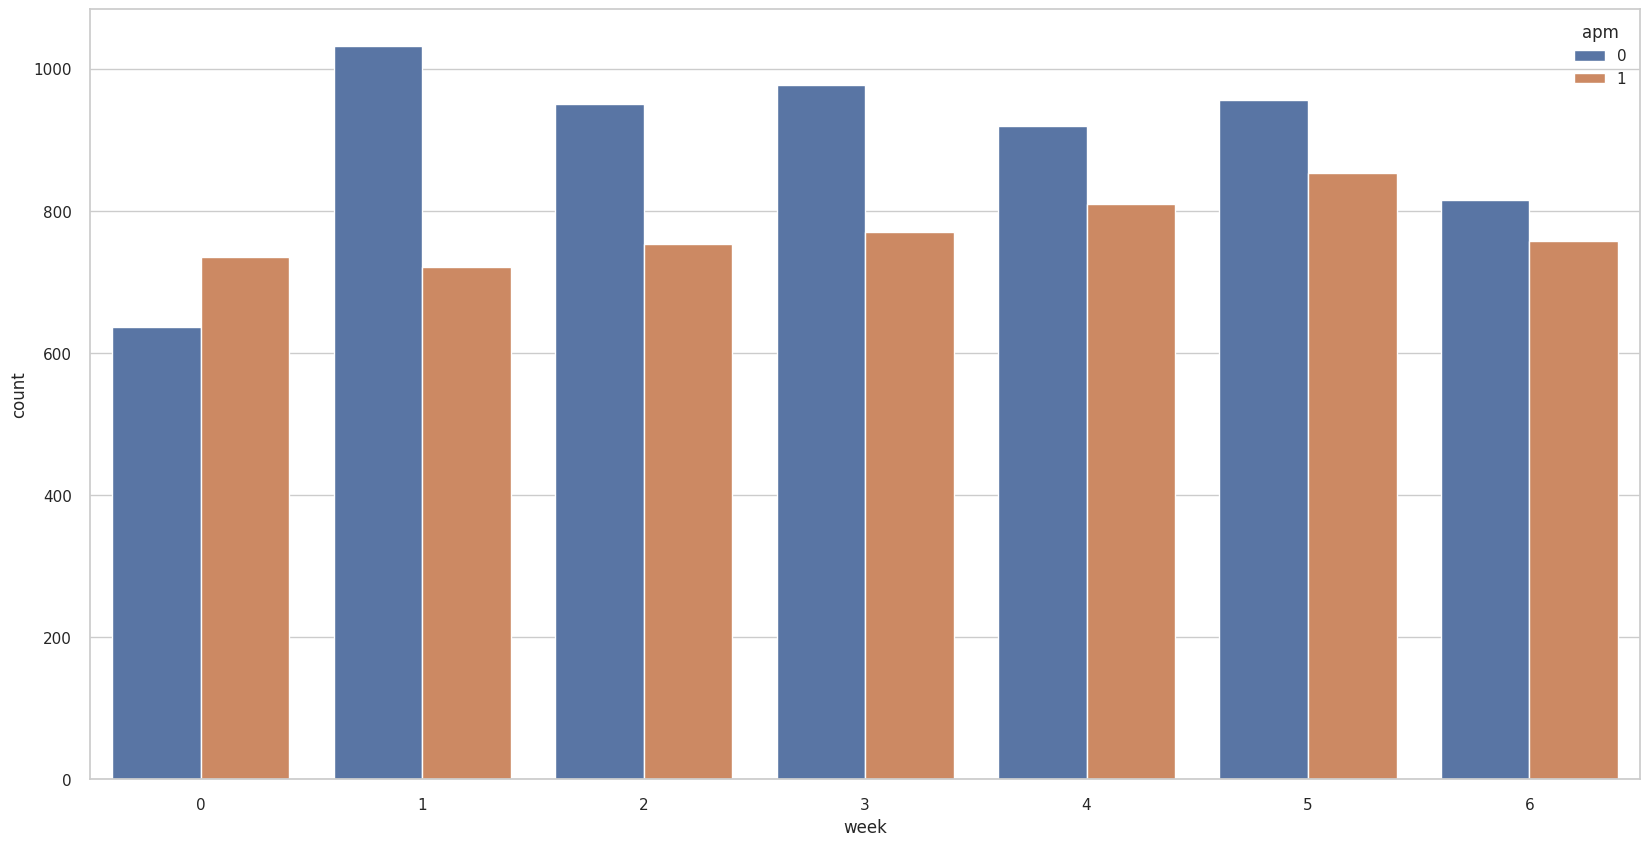

In [179]:
sns.countplot(x ='week',data = df2, hue = 'apm')

[Text(0.5, 1.0, 'city')]

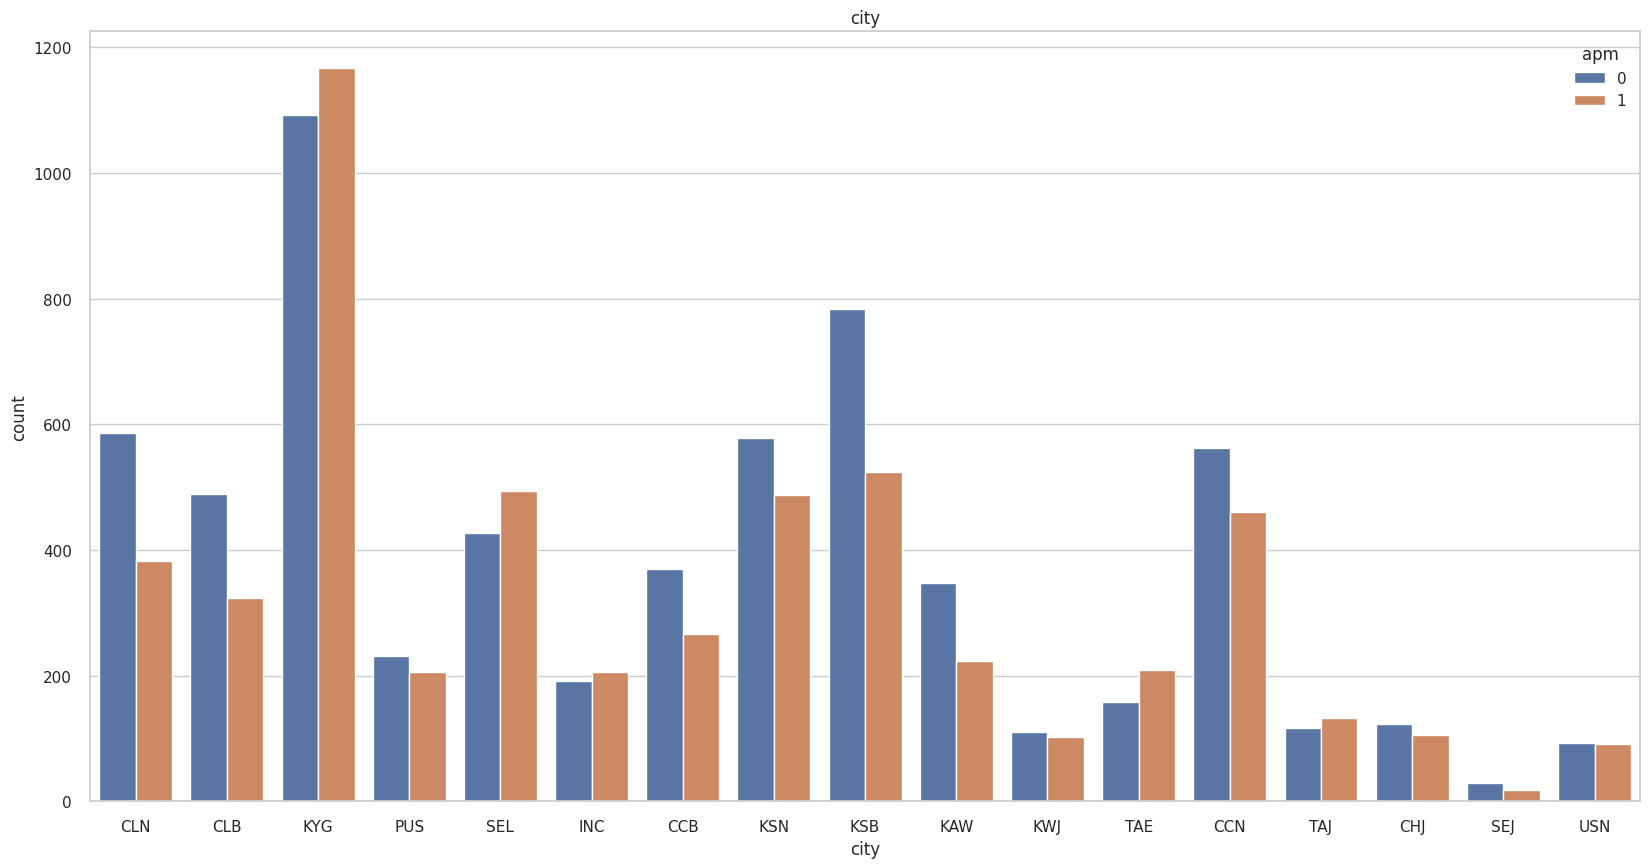

In [209]:
sns.countplot(x =object_col_e[0],data = df2, hue = 'apm').set(title=object_col_e[0])

[Text(0.5, 1.0, 'wound_main_c')]

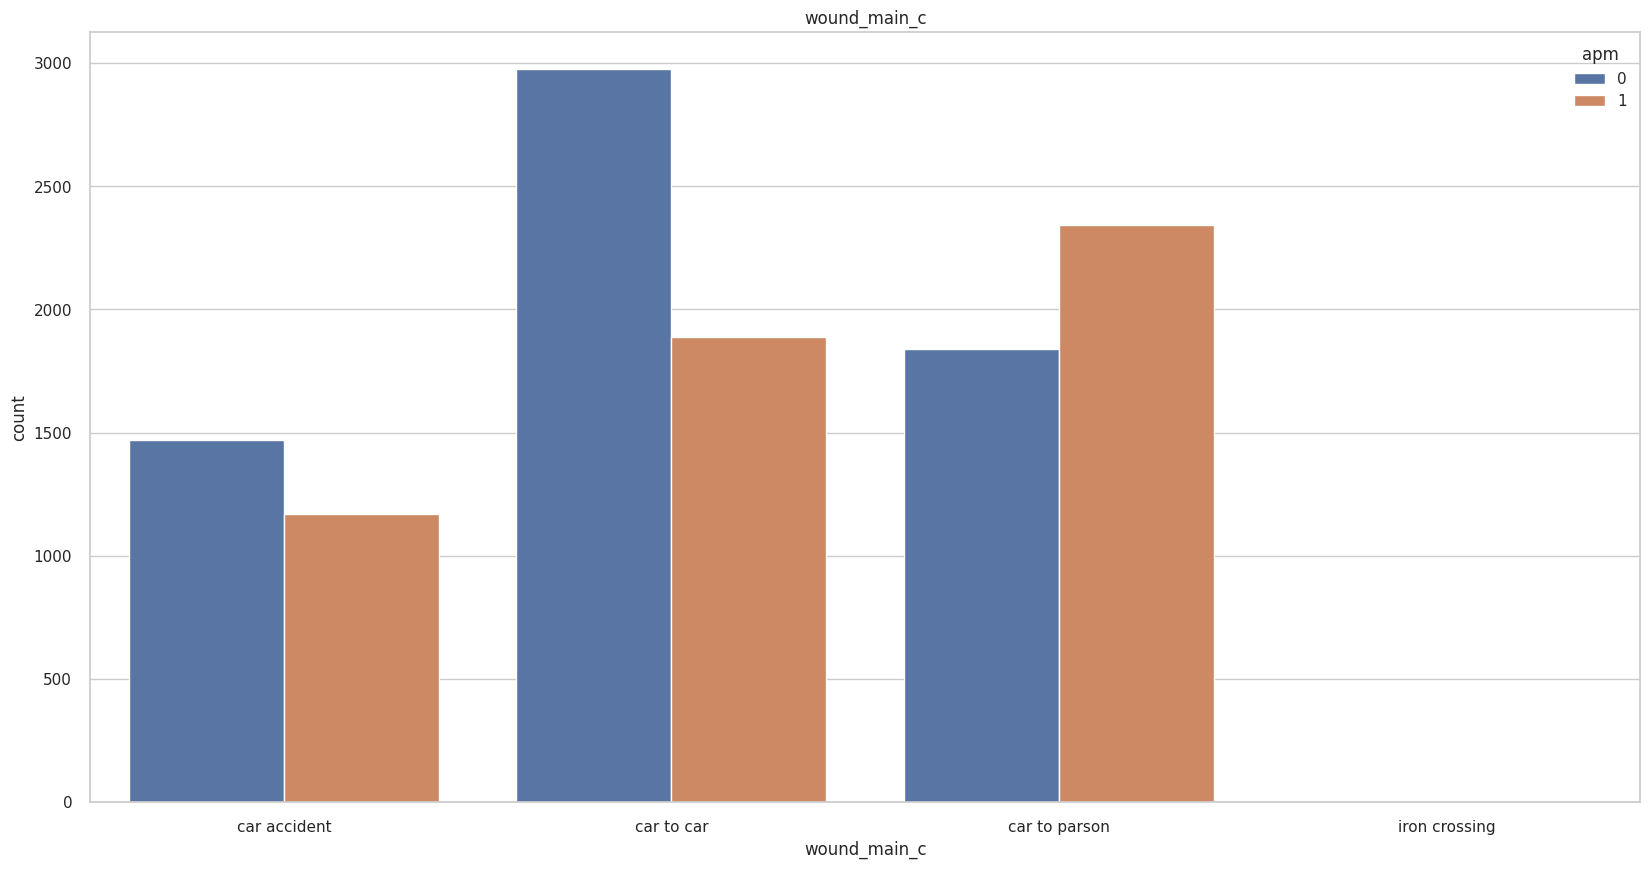

In [211]:
sns.countplot(x =object_col_e[2],data = df2, hue = 'apm').set(title=object_col_e[2])

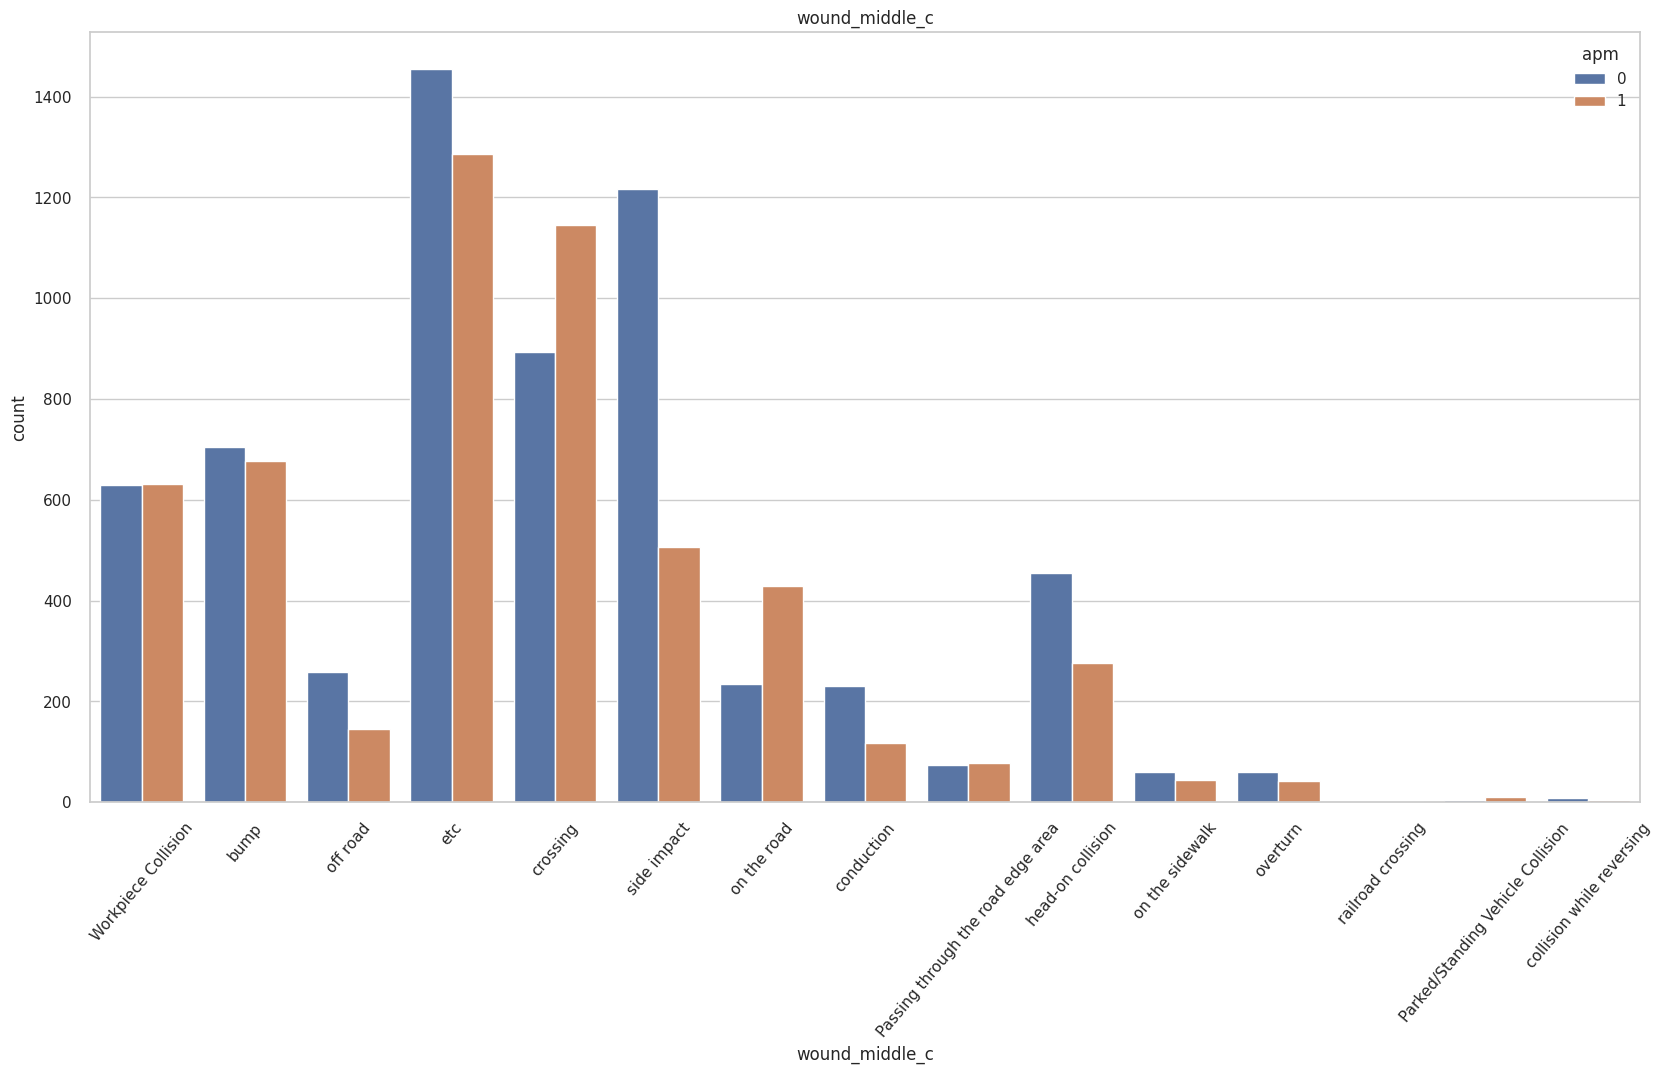

In [214]:
sns.countplot(x =object_col_e[3],data = df2, hue = 'apm').set(title=object_col_e[3])
plt.xticks(rotation = 50)
plt.show()

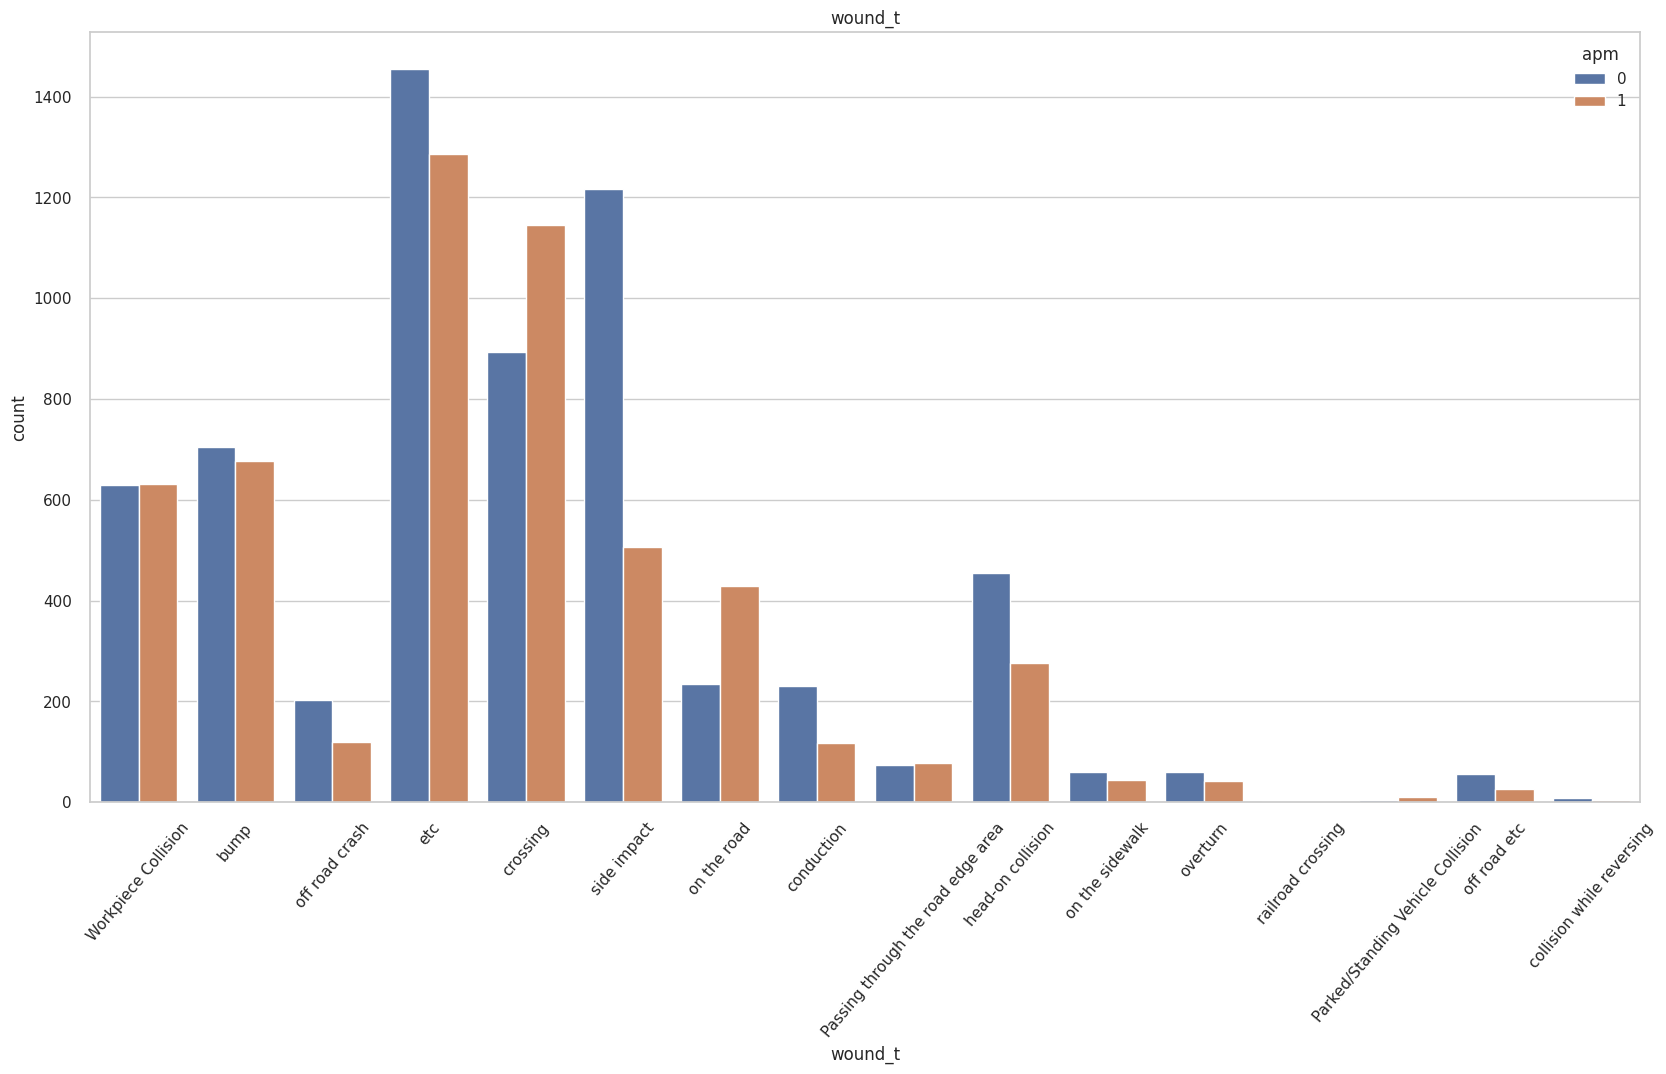

In [216]:
sns.countplot(x =object_col_e[4],data = df2, hue = 'apm').set(title=object_col_e[4])
plt.xticks(rotation = 50)
plt.show()

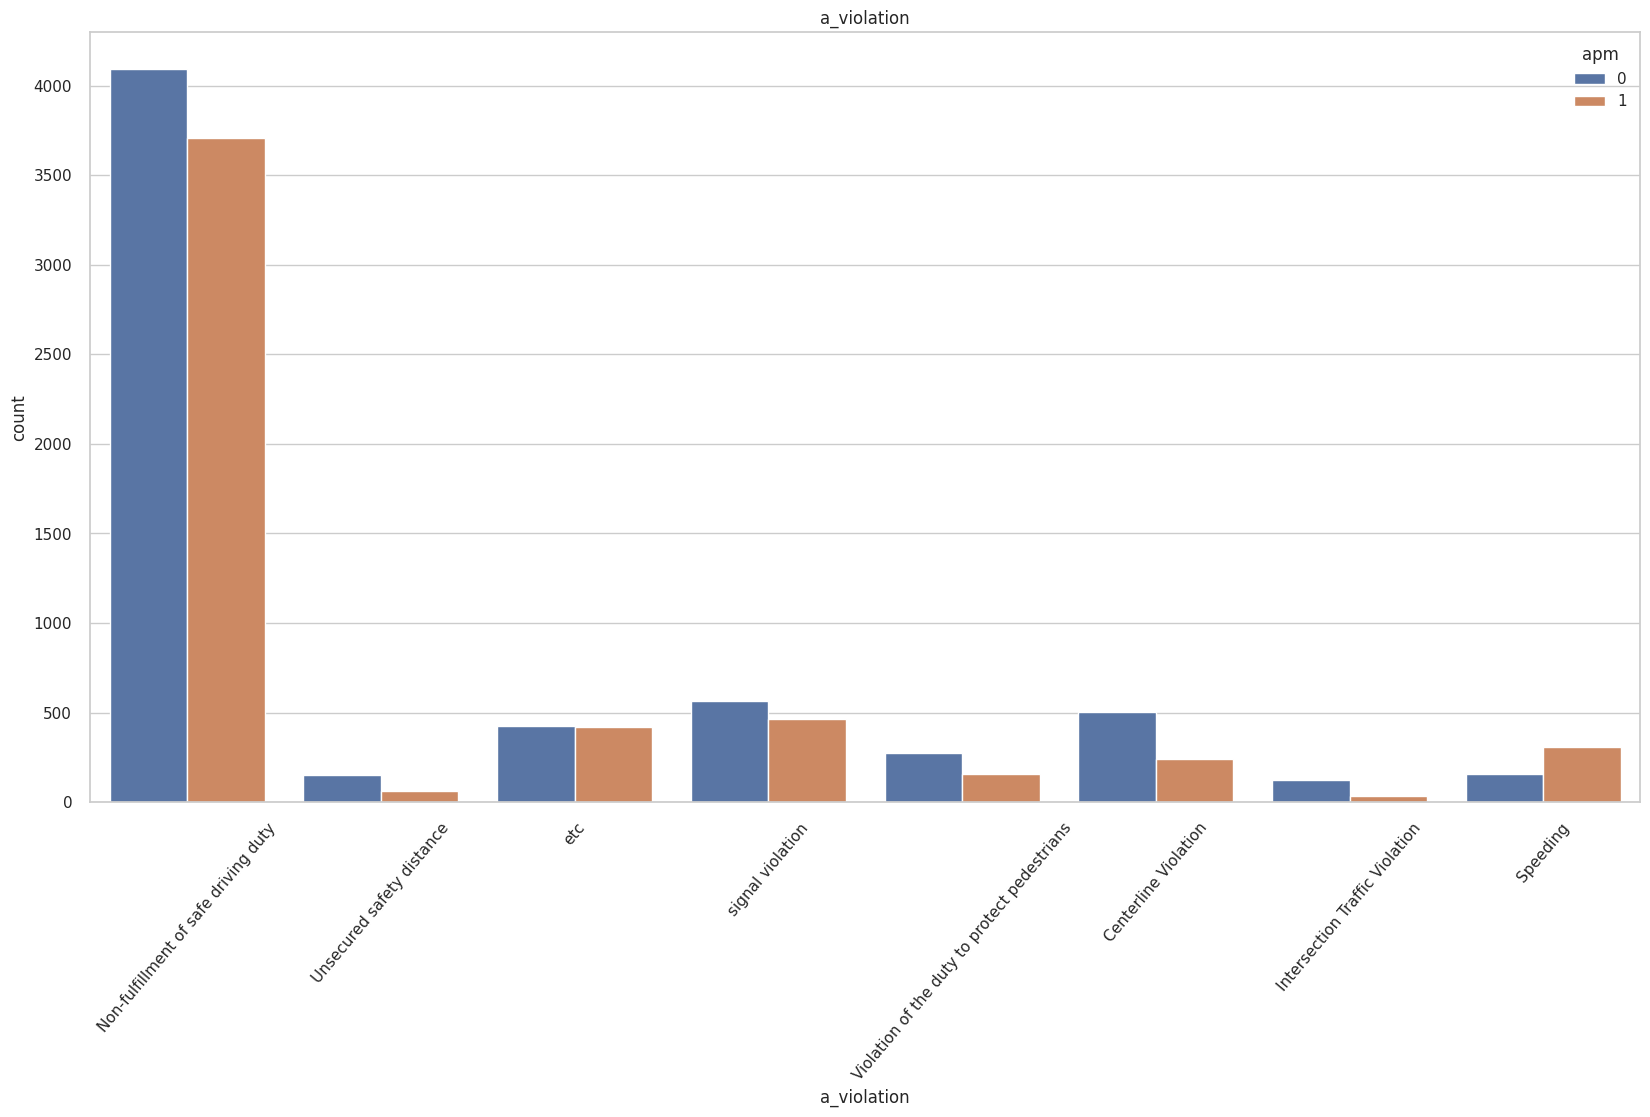

In [217]:
sns.countplot(x =object_col_e[5],data = df2, hue = 'apm').set(title=object_col_e[5])
plt.xticks(rotation = 50)
plt.show()

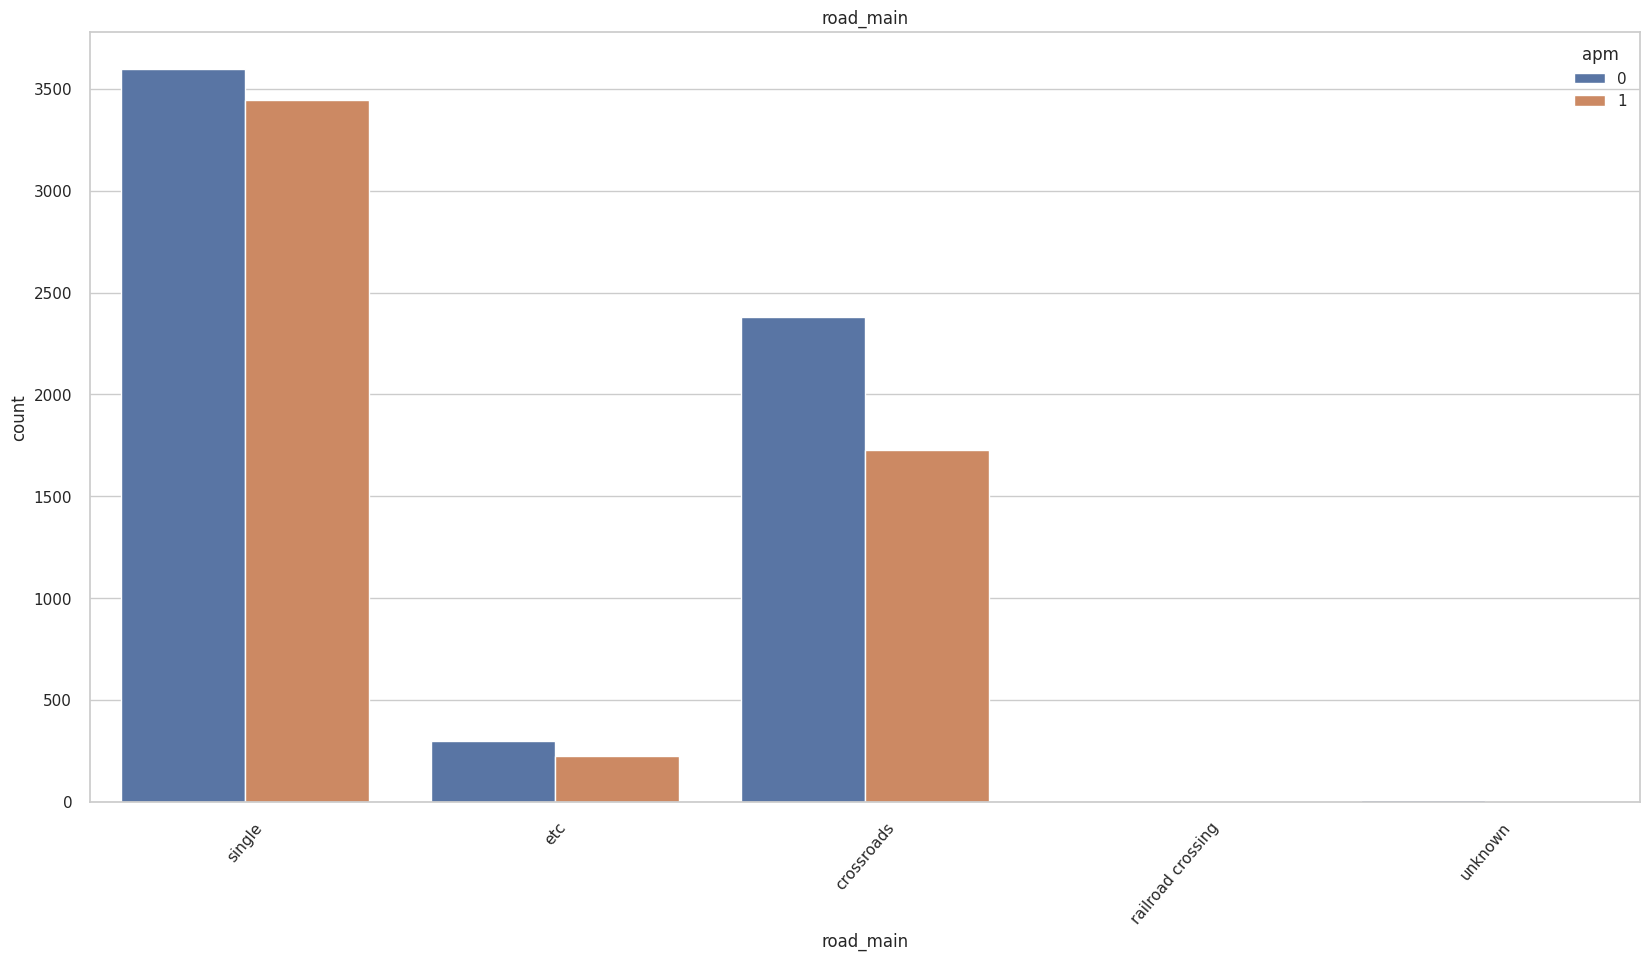

In [218]:
sns.countplot(x =object_col_e[6],data = df2, hue = 'apm').set(title=object_col_e[6])
plt.xticks(rotation = 50)
plt.show()

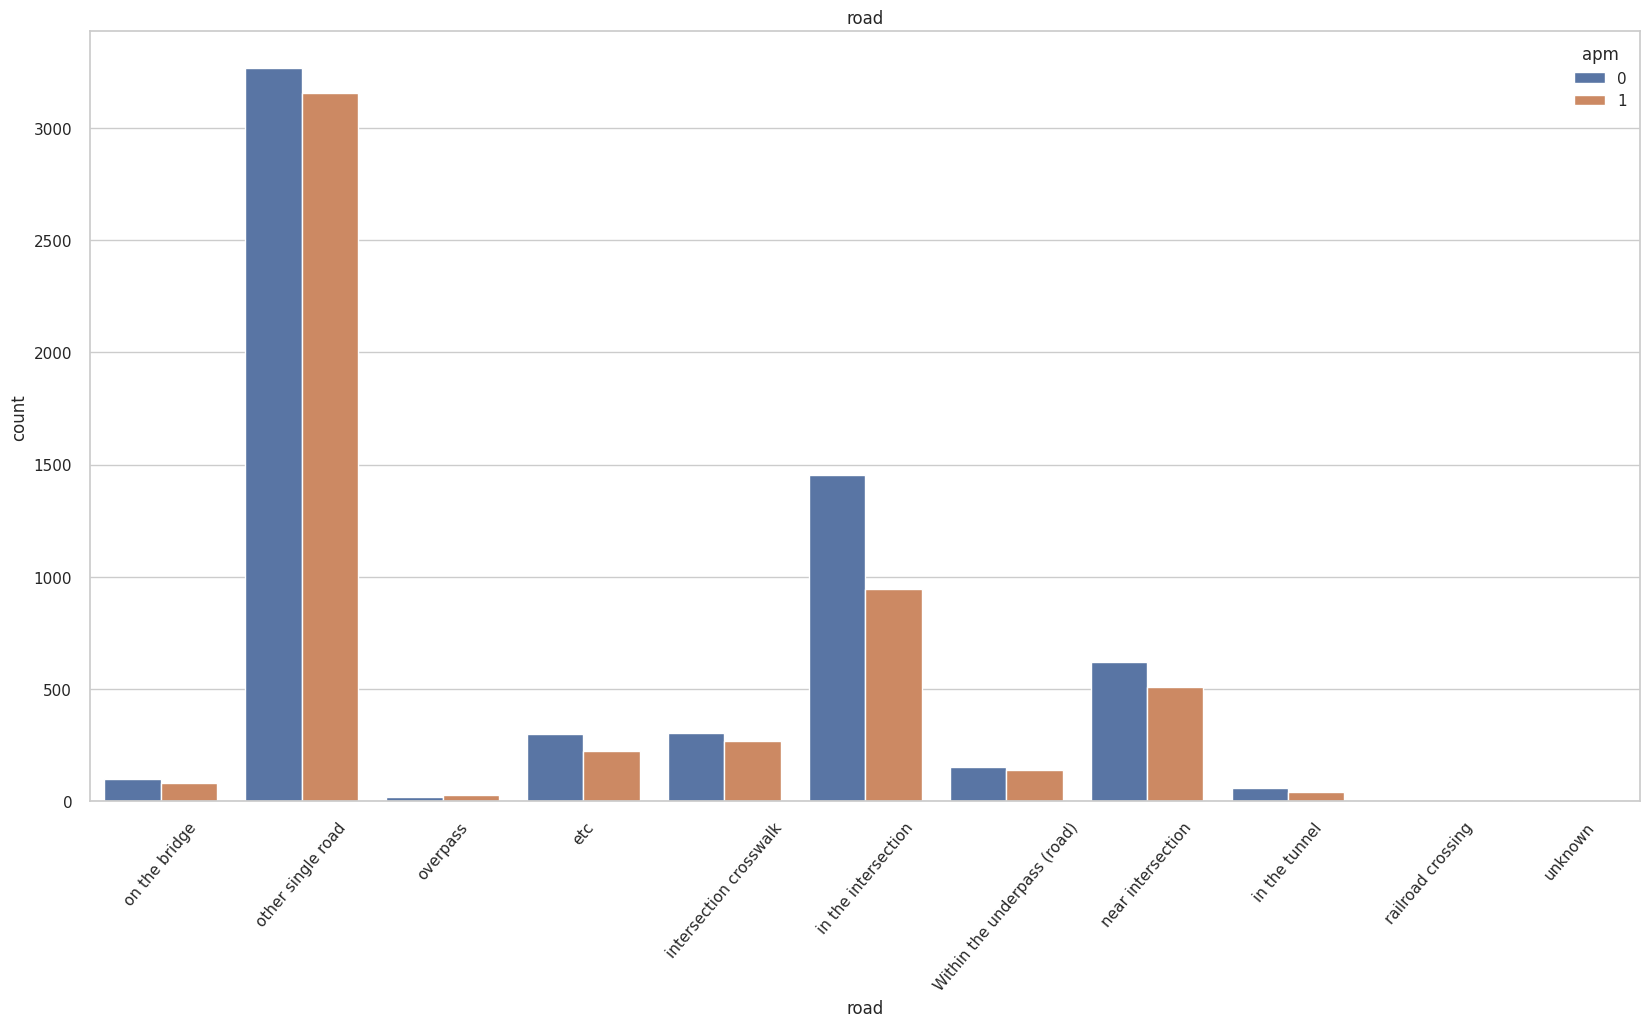

In [219]:
sns.countplot(x =object_col_e[7],data = df2, hue = 'apm').set(title=object_col_e[7])
plt.xticks(rotation = 50)
plt.show()

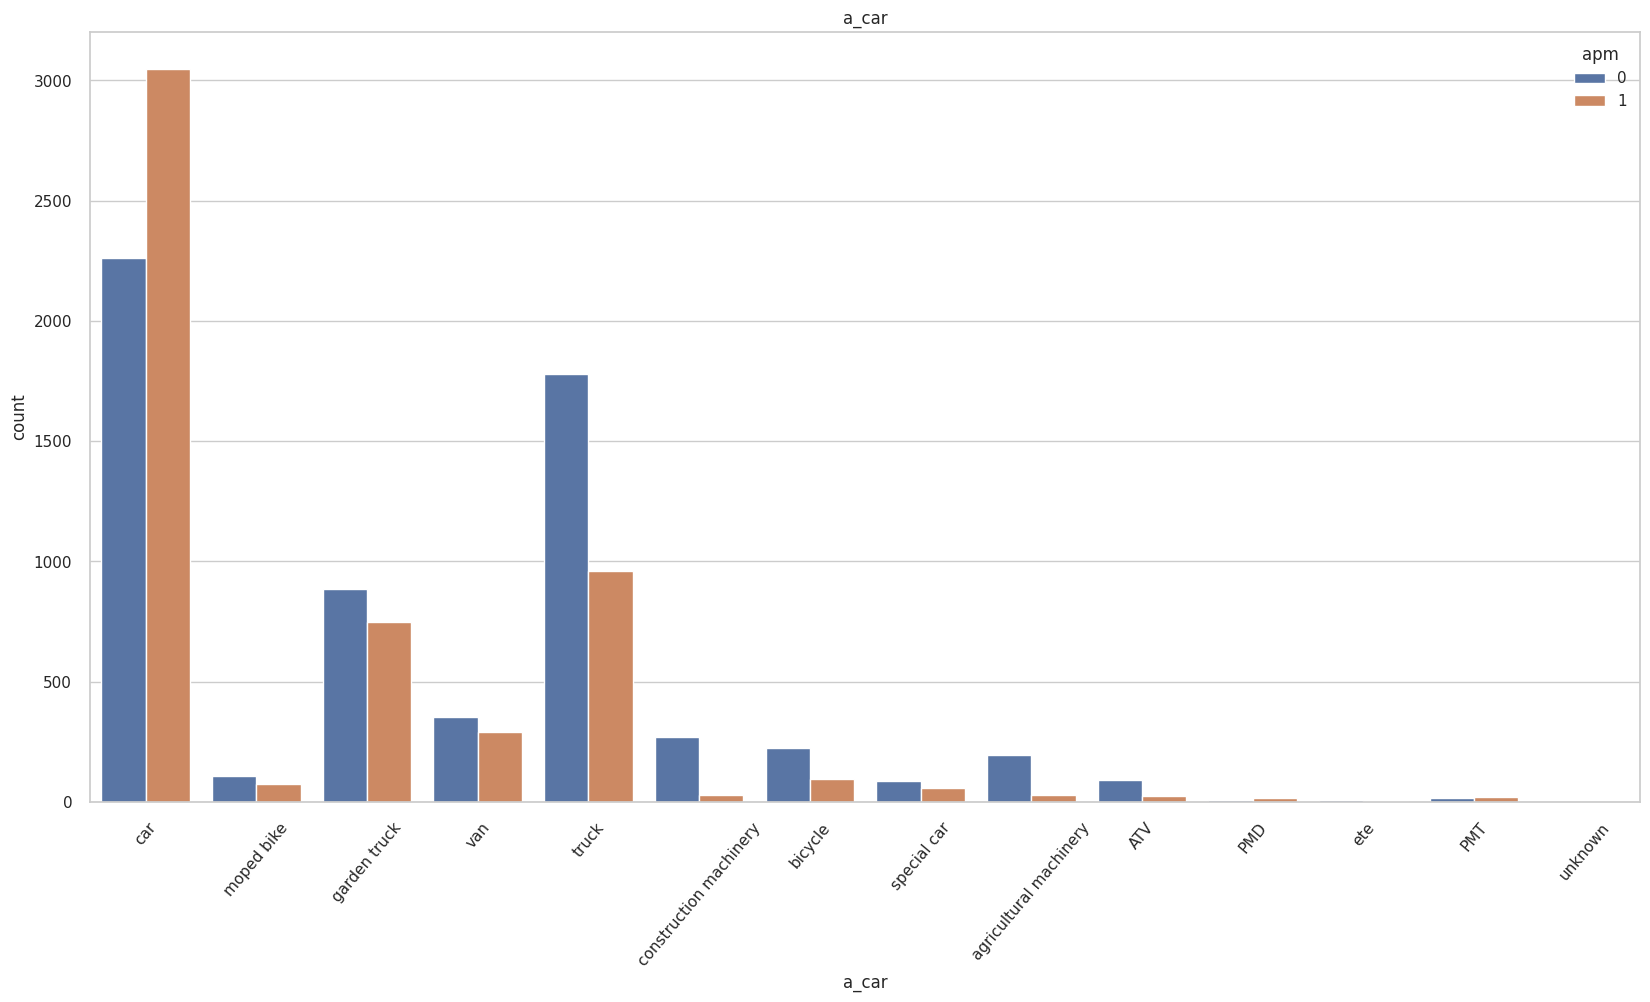

In [220]:
sns.countplot(x =object_col_e[8],data = df2, hue = 'apm').set(title=object_col_e[8])
plt.xticks(rotation = 50)
plt.show()

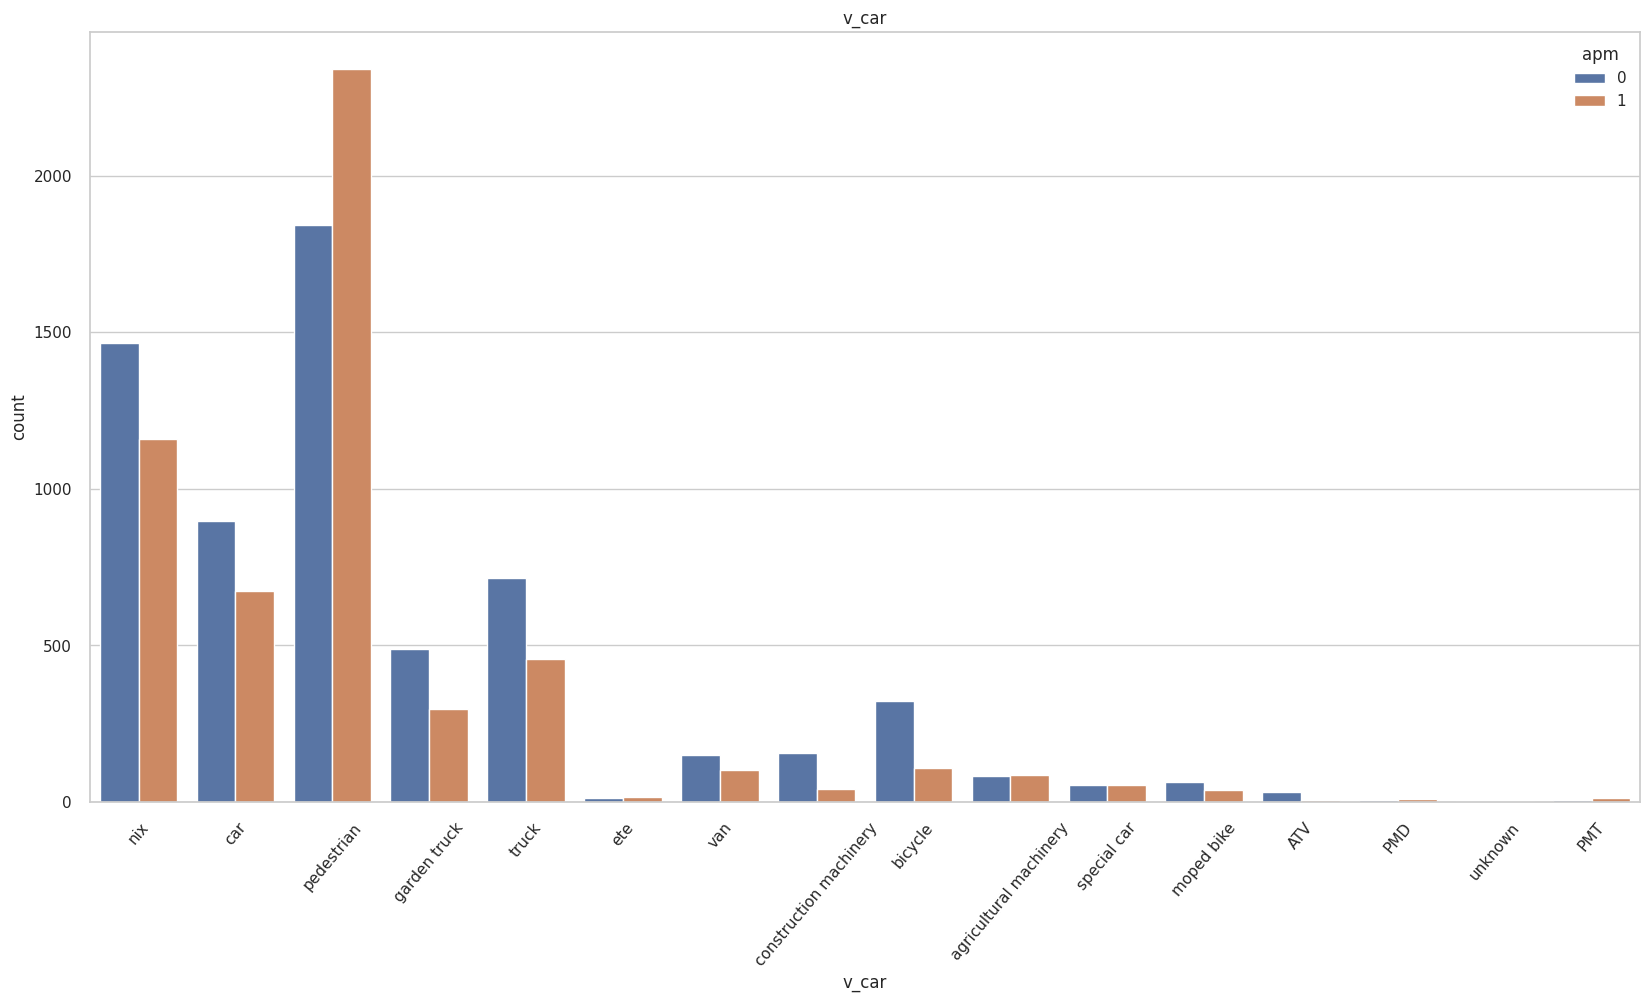

In [221]:
sns.countplot(x =object_col_e[9],data = df2, hue = 'apm').set(title=object_col_e[9])
plt.xticks(rotation = 50)
plt.show()

In [177]:
result = pd.crosstab(df2.a_car , df2.v_car)
result

v_car,ATV,PMD,PMT,agricultural machinery,bicycle,car,construction machinery,ete,garden truck,moped bike,nix,pedestrian,special car,truck,unknown,van
a_car,,,,,,,,,,,,,,,,
ATV,0,0,0,0,0,13,0,0,2,0,84,1,2,8,0,4
PMD,0,0,0,0,0,9,1,0,0,0,10,2,0,1,0,2
PMT,0,0,0,0,2,11,1,0,0,0,20,0,0,2,0,1
agricultural machinery,0,0,0,0,0,7,1,0,6,1,195,7,0,5,0,3
bicycle,0,0,0,0,9,105,5,0,8,0,109,17,1,47,0,22
car,17,9,13,81,197,620,73,19,453,56,848,2461,41,333,3,88
construction machinery,2,1,1,2,40,17,4,2,29,5,39,136,2,16,0,2
ete,0,0,0,0,0,4,0,0,0,0,4,0,0,5,0,0
garden truck,2,0,1,7,9,416,38,1,38,0,682,128,10,225,1,75


전국적으로 고르게 사고가 나는것으로 확인되며 특히 수도권 중심으로 이러나는 것을 확인할 수 있지만 도로가 아닌 곳에서도 일어나는것을 알 수 있음

<Axes: xlabel='longitude', ylabel='latitude'>

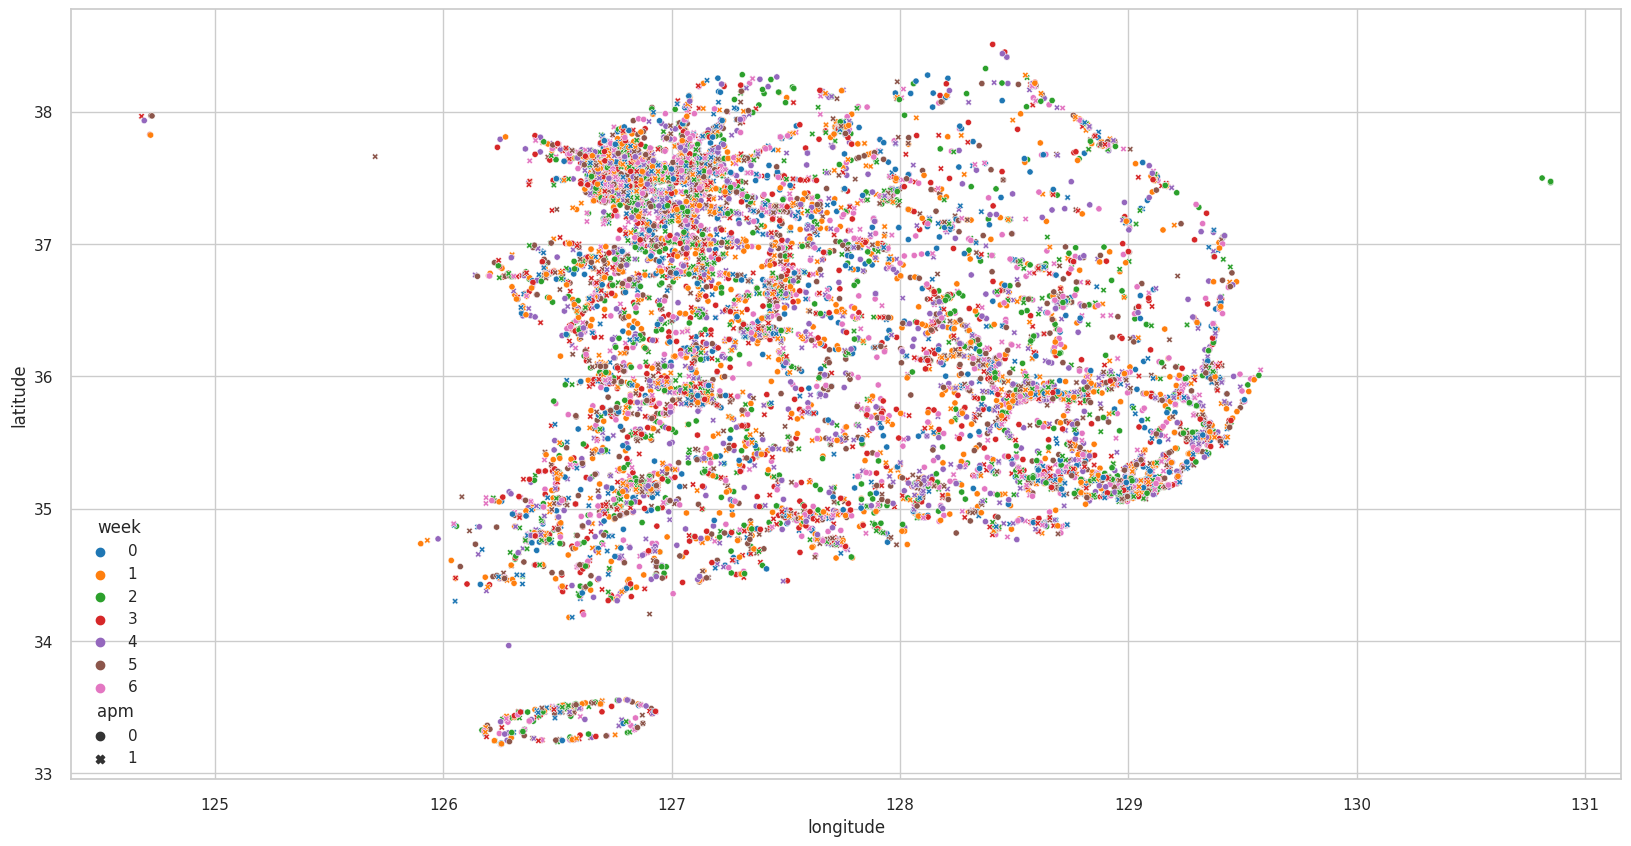

In [102]:
sns.set(rc = {'figure.figsize':(20,10)})

sns.set_style('whitegrid')
sns.scatterplot(data = df2, x= 'longitude', y ='latitude', style = 'apm', hue = 'week',
                palette = 'tab10'
                ,s = 20)


In [88]:
len(df2.year.unique())
df2.year.unique()[0]

2022

년도별 교통사고

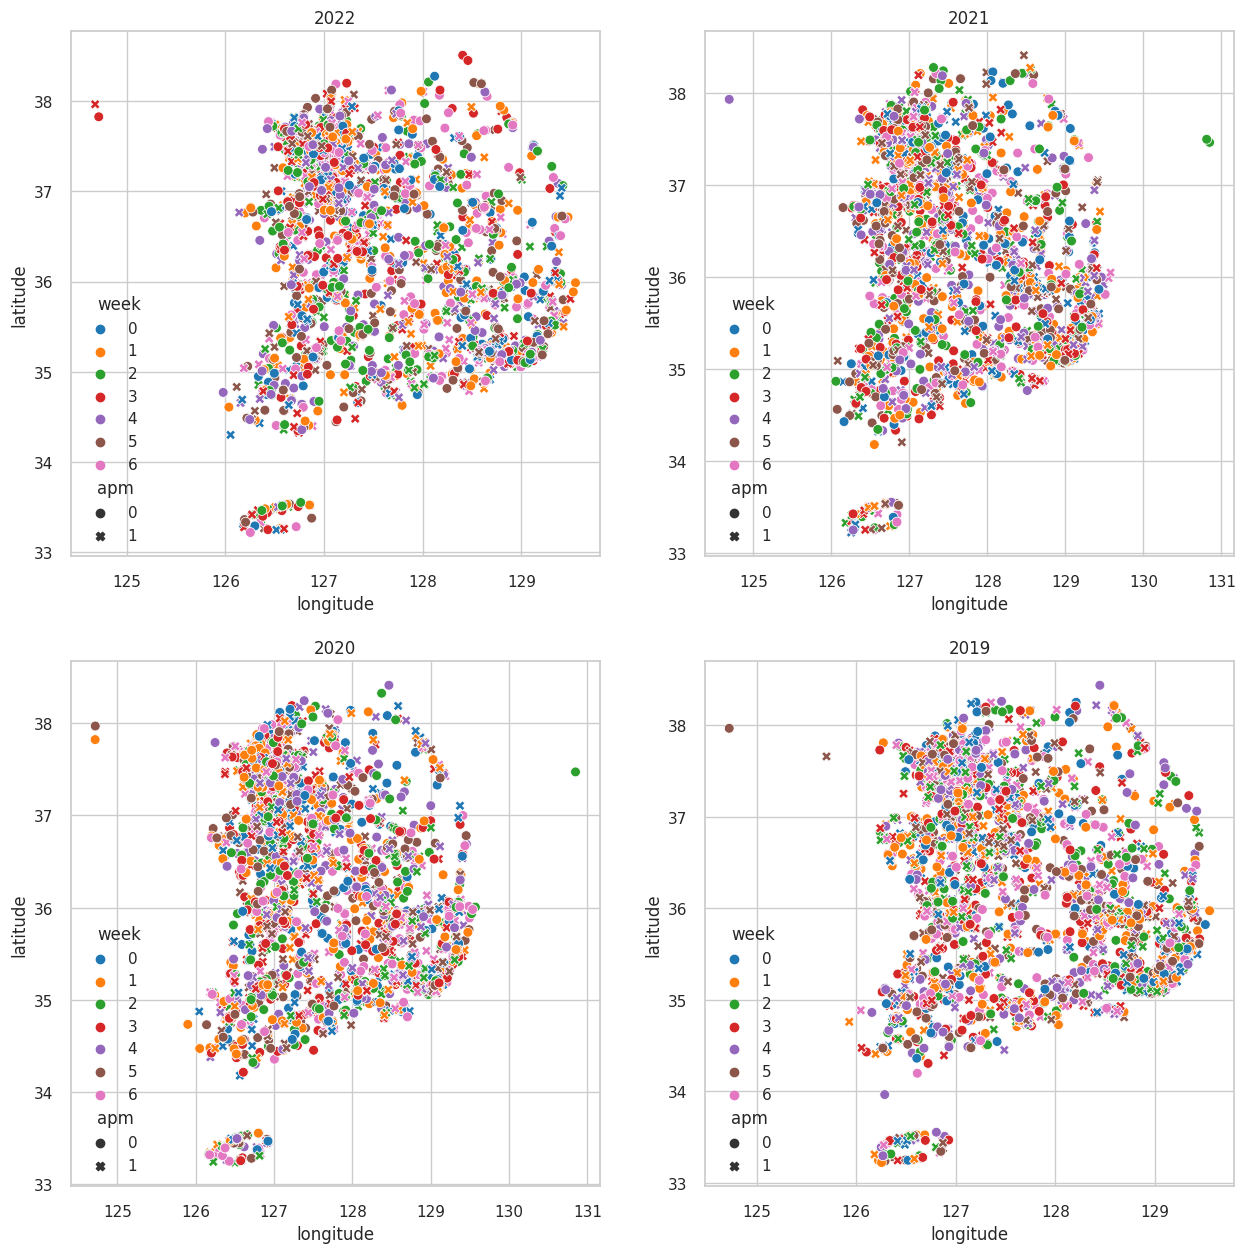

In [101]:
fig, ax = plt.subplots(ncols=2, nrows=2,  figsize=(15,15))
sns.set_style('whitegrid')

for c in range(len(df2.year.unique())):

  sns.scatterplot(data = df2.loc[df2.year==df2.year.unique()[c]], x= 'longitude', y ='latitude', style = 'apm', hue = 'week',
                  palette = 'tab10'
                  ,s = 50,ax = ax[int(c/2),int(c%2)]).set(title=df2.year.unique()[c])

2022년 서울에서 일어난 교통사고 사망건

In [74]:
location =  df2022.loc[df2022['발생지시도'] =='서울',['위도','경도']]
map= folium.Map(location=[location['위도'].mean() , location['경도'].mean()], zoom_start=11)


for i in location.index:
    folium.Marker(location=[location.loc[i, '위도'], location.loc[i, '경도']],
    icon=folium.Icon(color='red',size = 1)).add_to(map)

map

In [172]:
df4 = df3.copy()

df4.drop(columns = ['발생년월일시','발생위치X_UTMK','발생위치Y_UTMK','경도','위도','발생지시도','사고유형_중분류','도로형태_대분류'],inplace = True)

상관관계 분석시 날짜와 2가지가 같이 있어야하는 위도와 경도는 2가지 상관관계 분석에 적합하지 않아보이며 발생지시도와 사고유형_중분류, 도로형대 대분류는 비슷한내용이있어 적합하지 않다고 판단

In [174]:
test = pd.get_dummies(df4.select_dtypes(include=object)).corr().unstack().to_frame().reset_index().dropna()
test.rename(columns ={0 :"corr"} ,inplace =True)
test.loc[test['corr']!=1].sort_values('corr',ascending = False).drop_duplicates('corr').iloc[:20]

,level_0,level_1,corr
62409,사고유형_대분류_차량단독,피해자_당사자종별_없음,0.995839
62979,사고유형_공작물충돌,피해자_당사자종별_없음,0.646947
62918,사고유형_공작물충돌,사고유형_대분류_차량단독,0.644255
66906,사고유형_횡단중,사고유형_대분류_차대사람,0.615760
69483,가해자법규위반_중앙선 침범,사고유형_정면충돌,0.542993
62078,사고유형_대분류_차대차,사고유형_측면충돌,0.492546
62122,사고유형_대분류_차대차,피해자_당사자종별_승용차,0.464393
62077,사고유형_대분류_차대차,사고유형_추돌,0.433942
70350,도로형태_교차로내,가해자법규위반_신호위반,0.398993
62129,사고유형_대분류_차대차,피해자_당사자종별_화물차,0.390242


사고유형 대분류에서 차량 단독으로 혹은 공작물 충돌로 인하여 사망하는것이 가장 높은 상관관계를 가지고 있었다

In [231]:
df4

,발생년,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시군구,사고유형_대분류,사고유형,가해자법규위반,도로형태,가해자_당사자종별,피해자_당사자종별
0,2022,주,토,1,0,0,0,0,순천시,차량단독,공작물충돌,안전운전 의무 불이행,교량위,승용차,없음
1,2022,주,토,1,0,0,0,0,전주시,차대차,추돌,안전운전 의무 불이행,기타단일로,원동기장치자전거,승용차
2,2022,주,토,1,0,0,0,0,연천군,차량단독,도로이탈 추락,안전운전 의무 불이행,기타단일로,이륜차,없음
3,2022,야,토,1,0,0,0,0,기장군,차대차,기타,안전운전 의무 불이행,고가도로위,승용차,승용차
4,2022,주,일,1,0,0,0,0,서대문구,차대사람,횡단중,안전운전 의무 불이행,기타단일로,승합차,보행자
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11685,2019,야,화,1,0,0,0,0,강남구,차대사람,차도통행중,안전운전 의무 불이행,교차로부근,화물차,보행자
11686,2019,주,화,1,1,0,1,0,양양군,차대차,추돌,안전운전 의무 불이행,교차로내,승용차,건설기계
11687,2019,주,화,1,1,0,0,1,칠곡군,차량단독,공작물충돌,안전운전 의무 불이행,교차로내,승용차,없음
11688,2019,주,화,1,1,0,1,0,울주군,차대사람,횡단중,기타,교차로부근,승용차,보행자


비지도 학습 군집 여부 확인

In [226]:
df4.shape
df5 = pd.get_dummies(df4)
df5

,발생년,사망자수,부상자수,중상자수,경상자수,부상신고자수,주야_야,주야_주,요일_금,요일_목,...,피해자_당사자종별_불명,피해자_당사자종별_사륜오토바이(ATV),피해자_당사자종별_승용차,피해자_당사자종별_승합차,피해자_당사자종별_없음,피해자_당사자종별_원동기장치자전거,피해자_당사자종별_이륜차,피해자_당사자종별_자전거,피해자_당사자종별_특수차,피해자_당사자종별_화물차
0,2022,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2022,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2022,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2022,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2022,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11685,2019,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11686,2019,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11687,2019,1,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
11688,2019,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [233]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

data = pca.fit_transform(df5.drop(columns = ['발생년']))

data[:5]

array([[-0.62481432, -0.65595834],
       [-0.42621592, -0.97631061],
       [-0.63069397, -0.90847299],
       [-0.49057512, -0.17026346],
       [-0.7114984 ,  0.8358818 ]])

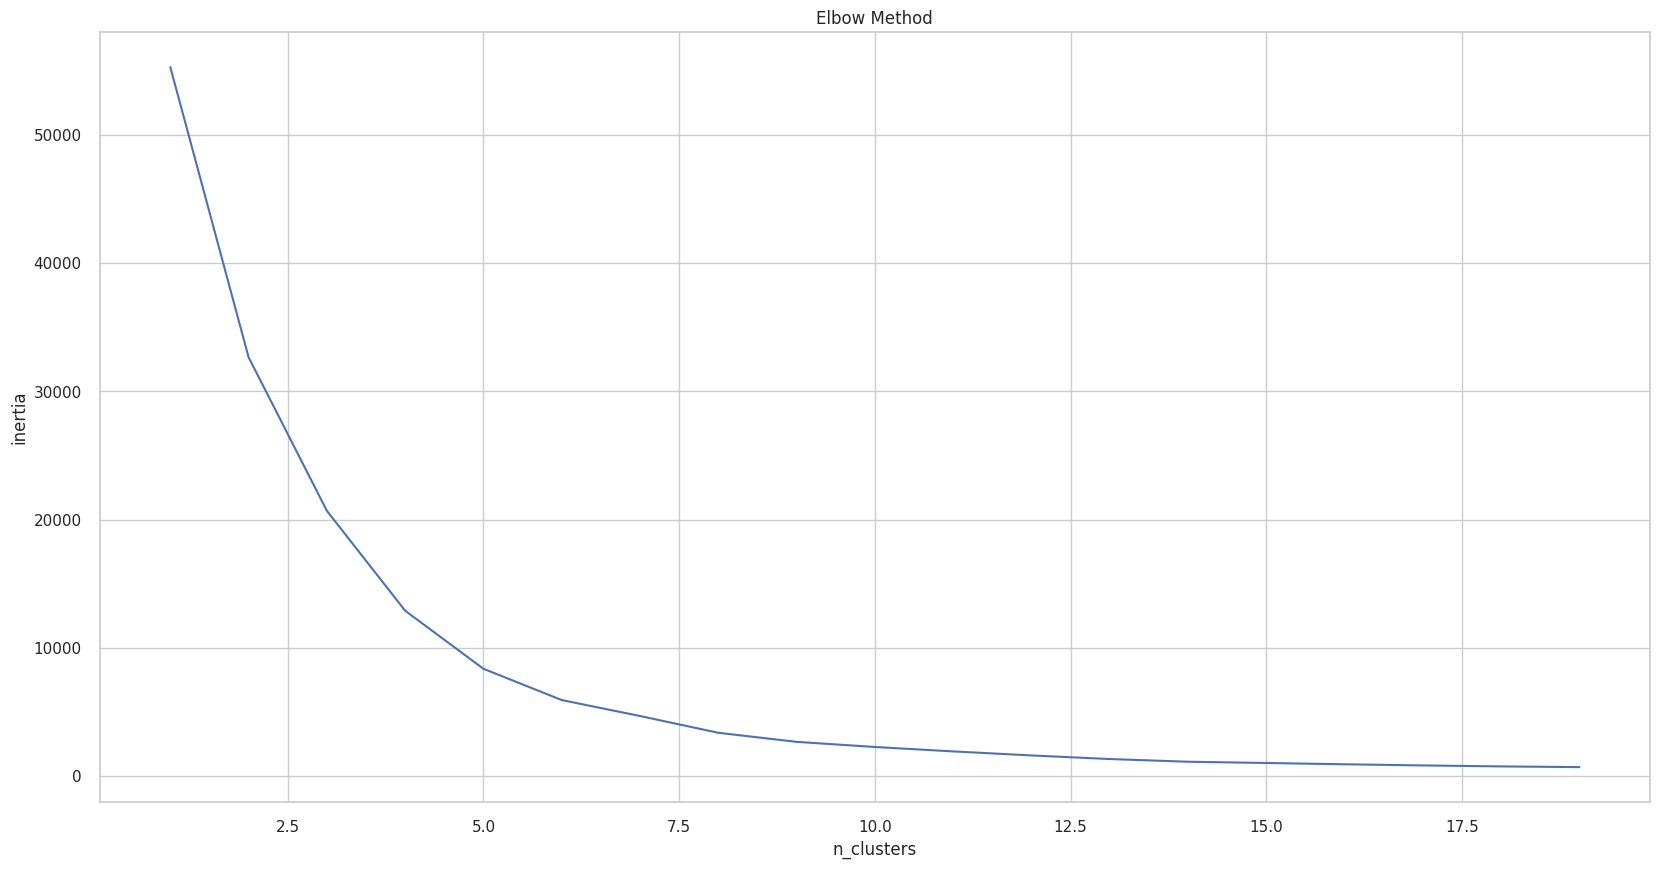

In [257]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(data)
    inertia_list.append(kmeans.inertia_) # 각 지점으로부터 클러스터의 중심(centroid) 까지의 거리의 제곱의 합

plt.plot(range(1, 20), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

In [263]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)

model.fit(data)

model.labels_

array([3, 3, 3, ..., 3, 1, 3], dtype=int32)

<ipython-input-264-353183c81019>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


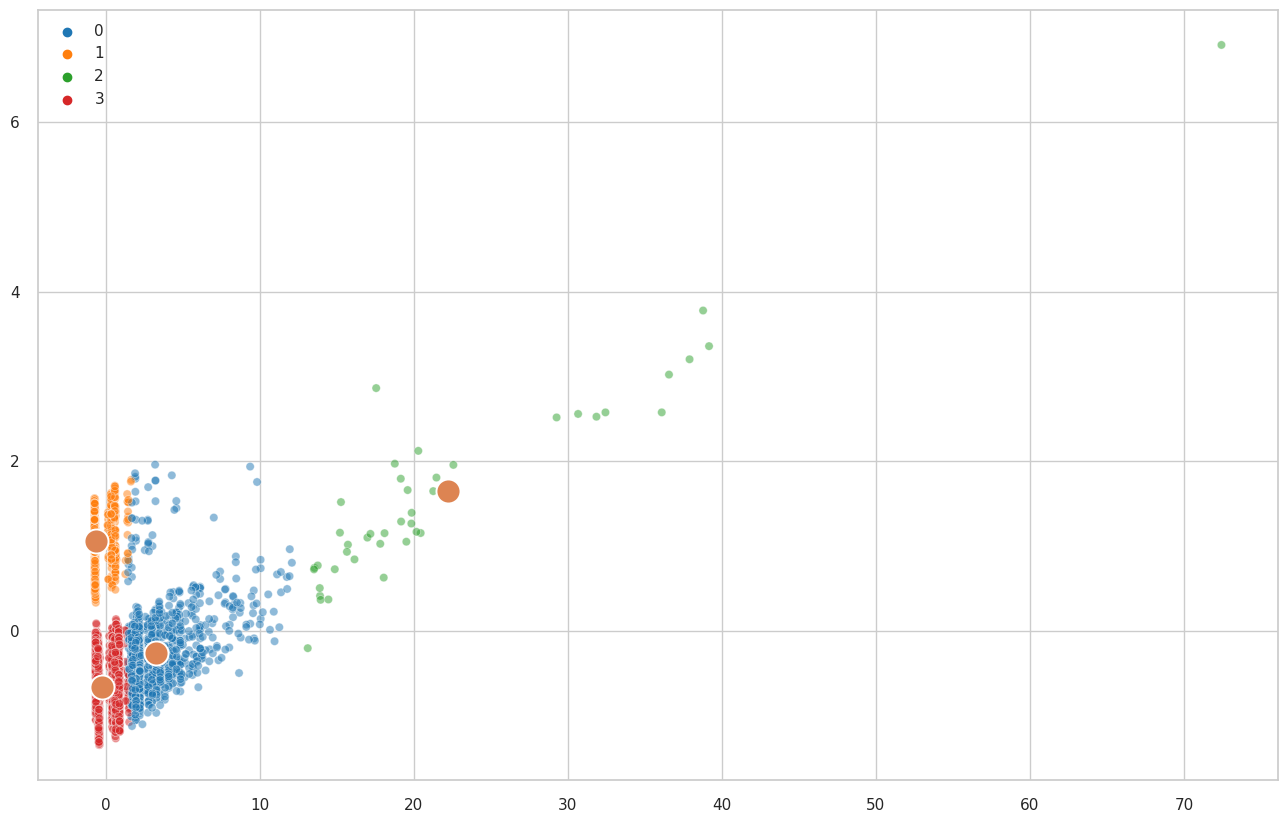

In [264]:
# colors = ['red', 'green', 'blue']
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x=data[:, 0],
    y=data[:, 1],
    hue=model.labels_,
    palette = 'tab10',
    # palette=colors,
    alpha=0.5,
)
sns.scatterplot(
    x=model.cluster_centers_[:, 0],
    y=model.cluster_centers_[:, 1],
    palette = 'tab10',
    # hue=[0, 1, 2],
    # palette=colors,
    s=300,
    legend=False
)
plt.show()

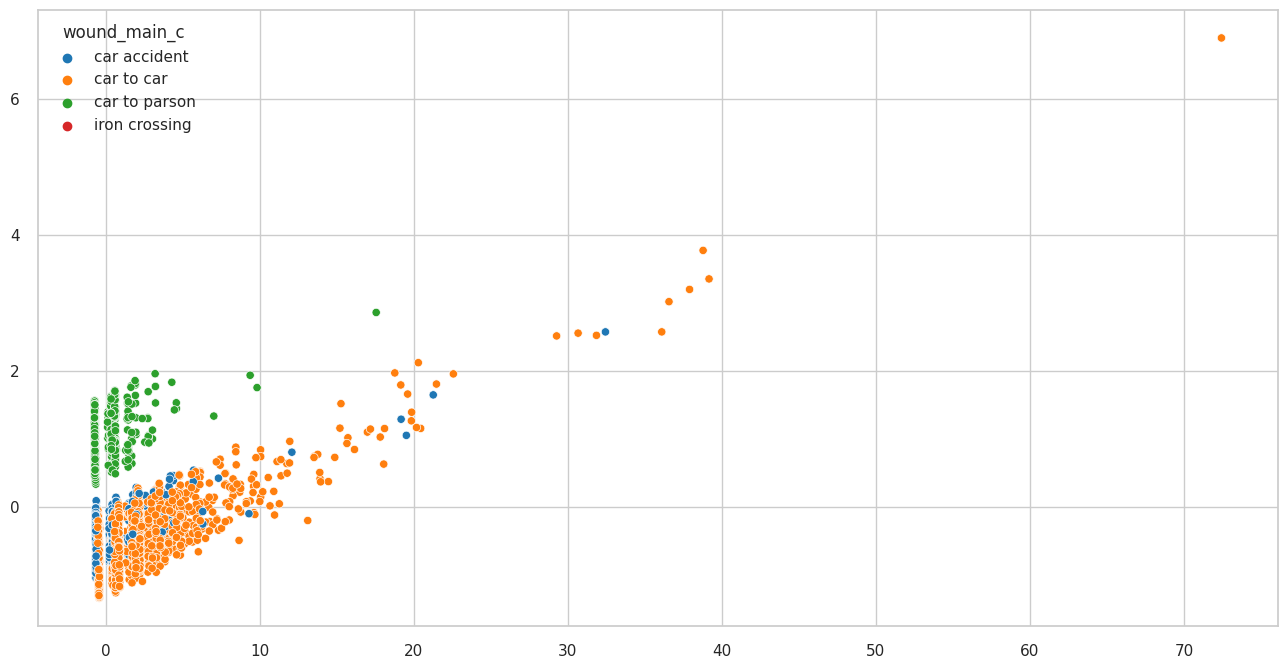

In [269]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue = df2.wound_main_c ,palette = 'tab10')
plt.show()

In [265]:
from sklearn.metrics import silhouette_score

silhouette_score(data, model.labels_)

0.6289736233014791

# 결론
### 사고유형 대분류에서 차량 단독으로 피해자 없으며 공작물 충돌이 상관관계가 높은것으로 확인되었으며
### 차량과 차량의 사고시 가장 높은 응집도의 사망율을 확인
### 산포도 차트를 통해서 특정지역, 요일, 주야, 년도, 상관없이 사망교통사고 일어나는것을 확인 또한 차종여부도 크게 관련이 없는것을 확인한다
